In [51]:
import numpy as np
from scipy.optimize import root
from scipy.special import legendre
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt



def orthogonal_collocation(fun, y0, t_range, n=6):

    def get_N(a, b, n):

        points = np.sort(np.hstack([-1, legendre(n - 1).deriv().roots, 1]))
        t = 0.5 * (b - a) * points + 0.5 * (b + a)
        A = np.array([[(j+1) * t[i+1] ** j for j in range(n-1)] for i in range(n-1)])
        B = np.array([[t[i+1]**(j+1) for j in range(n-1)] for i in range(n-1)])
        N = np.linalg.inv(np.dot(A, np.linalg.inv(B)))
        return t, N

    a, b = t_range[0], t_range[-1]
    t, N = get_N(a, b, n)
    k = len(y0)
    m = int(2*len(y0))
    y_guess = np.zeros((int(m), n-1))

    def solve(y):
        y = y.reshape(m, n-1)
        diff = np.array([fun(t, y[:k, j]) for j in range(n-1)]).T
        F1 = [np.dot(N,y[i + k]) - (y[i]-y0[i]) for i in range(k)]
        F2 = [y[i+k] - diff[i] for i in range(k)]
        F = np.array(F1 + F2).flatten()
        return  F.flatten()

    y = root(solve, y_guess).x.reshape(m, n-1)
    y_output = np.array([CubicSpline(t, [y0[i]] + list(y[i]))(t_range) for i in range(k)])

    return y_output


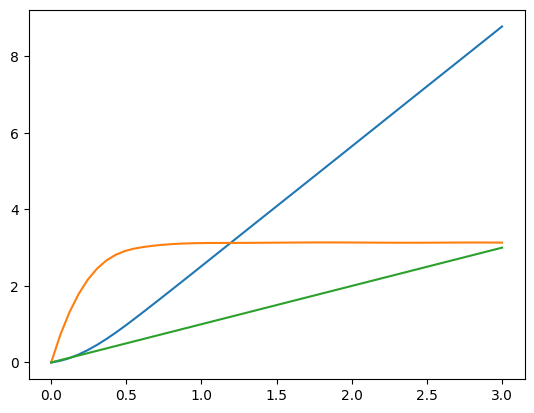

In [52]:
def fun(t, z):
    g = 9.81
    c = 1
    return [z[1], g - c*z[1]**2, 1]

y0 = [0, 0, 0]
t_range = np.linspace(0, 3)
y_output = orthogonal_collocation(fun, y0, t_range, 8)

plt.plot(t_range, y_output[0])
plt.plot(t_range, y_output[1])
plt.plot(t_range, y_output[2])

In [109]:
import numpy as np
N = np.array([[0.436,-0.281, 0.121],
              [0.614, 0.064, 0.0461],
              [0.603, 0.230, 0.167]])

time = np.array([0.0,
                 0.5-np.sqrt(5)/10.0,
                 0.5+np.sqrt(5)/10.0,
                 1.0])

from scipy.optimize import fsolve

y0 = 5
zGuess = np.zeros(6) # y1-y3 and dydt1-dydt3

def myFunction(z):
    y  = z[0:3]
    dy = z[3:6]

    F = np.empty(6)
    F[0:3] = np.dot(N,dy) - (y-y0)
    F[3:7] = dy + y
    return F

z = fsolve(myFunction,zGuess)
print(z)

[ 3.80135187  2.42579355  1.84220421 -3.80135187 -2.42579355 -1.84220421]


In [113]:
import numpy as np
from scipy.special import legendre, roots_legendre

def lobatto_points_and_weights(n):
    """
    Compute Lobatto points and weights for collocation using Lobatto quadrature.

    Parameters:
        n (int): Number of Lobatto points (including endpoints).

    Returns:
        x (np.ndarray): Lobatto collocation points.
        w (np.ndarray): Quadrature weights.
    """
    # Step 1: Generate the Legendre polynomial of degree n-1
    P_n_minus_1 = legendre(n - 1)

    # Step 2: Find the roots of the derivative of the Legendre polynomial
    roots, _ = roots_legendre(n - 2)  # Roots of P_(n-1)'(x)

    # Step 3: Include endpoints (-1 and 1) to get Lobatto points
    lobatto_points = np.hstack([-1, roots, 1])

    # Step 4: Compute quadrature weights
    weights = np.zeros(n)
    for i in range(n):
        P_n = legendre(n - 1)(lobatto_points[i])
        weights[i] = 2 / (n * (n - 1) * P_n**2)

    return lobatto_points, weights

def differentiation_matrix(lobatto_points):
    """
    Compute the differentiation matrix for Lobatto collocation.

    Parameters:
        lobatto_points (np.ndarray): Lobatto collocation points.

    Returns:
        D (np.ndarray): Differentiation matrix.
    """
    n = len(lobatto_points)
    D = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i != j:
                # Lagrange basis derivative
                D[i, j] = (-1)**(i + j) / (lobatto_points[i] - lobatto_points[j])
        D[i, i] = -np.sum(D[i, :])

    return D

# Example usage
n = 4  # Number of collocation points (including endpoints)
lobatto_points, weights = lobatto_points_and_weights(n)
D = differentiation_matrix(lobatto_points)

# Print results
print("Lobatto Points:")
print(lobatto_points)

print("\nQuadrature Weights:")
print(weights)

print("\nDifferentiation Matrix:")
print(D)

Lobatto Points:
[-1.         -0.57735027  0.57735027  1.        ]

Quadrature Weights:
[0.16666667 1.125      1.125      0.16666667]

Differentiation Matrix:
[[-2.23205081  2.3660254  -0.6339746   0.5       ]
 [-2.3660254   2.1339746   0.8660254  -0.6339746 ]
 [ 0.6339746  -0.8660254  -2.1339746   2.3660254 ]
 [-0.5         0.6339746  -2.3660254   2.23205081]]


[-0.86113631 -0.33998104  0.33998104  0.86113631]


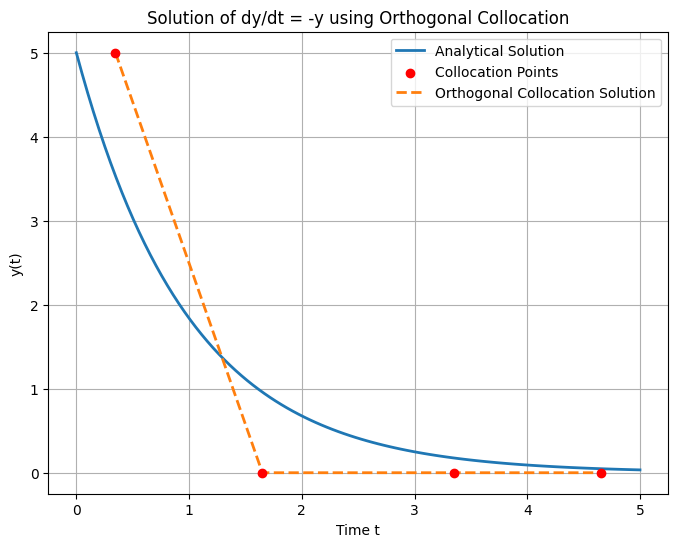

In [110]:
import numpy as np
from scipy.optimize import root
from numpy.polynomial.legendre import
import matplotlib.pyplot as plt

def solve_orthogonal_collocation(y0, t_end, num_points):
    """
    Solves dy/dt = -y using orthogonal collocation.

    Parameters:
        y0 (float): Initial condition y(0).
        t_end (float): End time.
        num_points (int): Number of collocation points.

    Returns:
        t_collocation (array): Collocation points in time.
        y_solution (array): Solution at collocation points.
    """
    # Step 1: Generate Legendre-Gauss collocation points
    collocation_points, _ = Legendre(num_points)
    print(collocation_points)
    t_collocation = 0.5 * t_end * (collocation_points + 1)  # Map to [0, t_end]
    h = t_end / 2  # Scaling factor for time interval

    # Step 2: Construct the differentiation matrix
    def differentiation_matrix(points):
        n = len(points)
        D = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                if i != j:
                    D[i, j] = np.prod([(points[i] - points[k]) / (points[j] - points[k])
                                       for k in range(n) if k != j]) / (points[i] - points[j])
            D[i, i] = -np.sum(D[i, :i]) - np.sum(D[i, i+1:])
        return D

    D = differentiation_matrix(collocation_points) / h  # Scale differentiation matrix

    # Step 3: Define residual function
    def residual(y):
        """
        Residual function for orthogonal collocation.
        """
        dy_dt = np.dot(D, y)  # Approximate derivative
        return dy_dt + y  # Residual for dy/dt = -y

    # Step 4: Initial guess
    y_guess = np.full(num_points, y0)  # Initial guess: all values start at y0

    # Step 5: Solve the nonlinear system
    solution = root(residual, y_guess, method='hybr')

    if not solution.success:
        raise RuntimeError("Solver failed to converge: " + solution.message)

    y_solution = solution.x

    # Step 6: Enforce the initial condition (adjust first value)
    y_solution[0] = y0

    return t_collocation, y_solution

# Solve the problem
y0 = 5.0        # Initial condition y(0) = 5
t_end = 5.0     # Solve for t in [0, 5]
num_points = 4 # Number of collocation points

t_collocation, y_solution = solve_orthogonal_collocation(y0, t_end, num_points)

# Analytical solution for comparison
t_exact = np.linspace(0, t_end, 100)
y_exact = y0 * np.exp(-t_exact)

# Plot the solution
plt.figure(figsize=(8, 6))
plt.plot(t_exact, y_exact, label="Analytical Solution", linewidth=2)
plt.scatter(t_collocation, y_solution, color='red', zorder=5, label="Collocation Points")
plt.plot(t_collocation, y_solution, linestyle='--', label="Orthogonal Collocation Solution", linewidth=2)
plt.xlabel("Time t")
plt.ylabel("y(t)")
plt.title("Solution of dy/dt = -y using Orthogonal Collocation")
plt.legend()
plt.grid(True)
plt.show()
